In [1]:
import h5py
import astropy
import astropy.units as u 
import astropy.coordinates as coord
import astropy.time as at
import astropy.constants as const
import numpy as np

import sys 

sys.path.insert(0,'..')
import jabble.dataset
import jabble.loss
import jabble.model

import pickle
import os

sys.path.insert(0,'../../WobbleSim')
import simulacra.dataset

In [15]:
indir = '/scratch/mdd423/simulacra/out/2021-11-02/'
outdir = '/scratch/mdd423/wobble_jax/out/'
filenames = sorted([os.path.join(outdir, file) for file in os.listdir(outdir) if file.startswith('data_e30')])

datanames = sorted([os.path.join(indir, file) for file in os.listdir(indir) if file.startswith('data_e30')])
# for file in os.listdir(indir) if file.startswith('data_e30'):
    

In [16]:
for x,y in zip([os.path.split(x)[1] for x in sorted(filenames)], [os.path.split(x)[1] for x in sorted(datanames)]):
#     filenames.append(x)
#     datanames.append(y)
    print(x + '\n' + y)
    print('\n')

data_e30_R70000.0_a2000.0_p40.3_l7.0e+039.0e+03_ep1.0_w0.0_snr1.4e+01_tp3e-07.jab
data_e30_R70000.0_a2000.0_p40.3_l7.0e+039.0e+03_ep1.0_w0.0_snr1.4e+01_tp3e-07.h5


data_e30_R70000.0_a2000.0_p40.3_l7.0e+039.0e+03_ep1.0_w0.0_snr2.0e+02_tp3e-07.jab
data_e30_R70000.0_a2000.0_p40.3_l7.0e+039.0e+03_ep1.0_w0.0_snr2.0e+02_tp3e-07.h5


data_e30_R70000.0_a2000.0_p40.3_l7.0e+039.0e+03_ep1.0_w0.0_snr2.1e+01_tp3e-07.jab
data_e30_R70000.0_a2000.0_p40.3_l7.0e+039.0e+03_ep1.0_w0.0_snr2.1e+01_tp3e-07.h5


data_e30_R70000.0_a2000.0_p40.3_l7.0e+039.0e+03_ep1.0_w0.0_snr3.5e+01_tp3e-07.jab
data_e30_R70000.0_a2000.0_p40.3_l7.0e+039.0e+03_ep1.0_w0.0_snr3.5e+01_tp3e-07.h5


data_e30_R70000.0_a2000.0_p40.3_l7.0e+039.0e+03_ep1.0_w0.0_snr4.0e+02_tp3e-07.jab
data_e30_R70000.0_a2000.0_p40.3_l7.0e+039.0e+03_ep1.0_w0.0_snr4.0e+02_tp3e-07.h5


data_e30_R70000.0_a2000.0_p40.3_l7.0e+039.0e+03_ep1.0_w0.0_snr4.3e+00_tp3e-07.jab
data_e30_R70000.0_a2000.0_p40.3_l7.0e+039.0e+03_ep1.0_w0.0_snr4.3e+00_tp3e-07.h5


data_e30_R

In [17]:
models = []
for filename in filenames:
    models.append(jabble.model.load(filename))

In [18]:
import matplotlib.pyplot as plt

In [19]:
import scipy.ndimage
def normalize(y,sigma):
    y_low = scipy.ndimage.gaussian_filter(y,sigma)
    return y/y_low

In [20]:
datasets = []
all_data = []
# timess   = []
# bcs      = []
# rvs      = []
# periods  = []
# snrs     = []

# distances = []

for filename in datanames:
    data    = simulacra.dataset.from_h5(filename)
    epoches = data['data']['flux'].shape[0]

    masks = np.array(data['data']['mask'],dtype=bool)
    wave = np.repeat(np.array(data['data']['wave'])[np.newaxis,:],epoches,axis=0) * u.Angstrom
    flux = np.array(data['data']['flux'])
    ferr = np.array(data['data']['ferr'])
    print(np.where(np.isnan(ferr)))
    print(np.where(masks))
    masks = np.isnan(ferr)
    
    sigma = 80
    wob_data = jabble.dataset.WobbleDataset(wave,flux,ferr,masks,normalize,nargs=[sigma])
    wob_data.set_masks(0.0,10.0)
    datasets.append(wob_data)
    all_data.append(data)

<HDF5 dataset "obs_times": shape (30,), type "|O">
(array([ 0,  0,  0, ..., 29, 29, 29]), array([ 3106,  3108,  3109, ..., 12830, 12850, 27702]))
(array([], dtype=int64), array([], dtype=int64))


../jabble/dataset.py:130: RuntimeWarning: divide by zero encountered in log
  self.xs, self.ys, self.yerr = np.log(wave.to(u.Angstrom).value), np.log(flux_norm), flux_error/flux


<HDF5 dataset "obs_times": shape (30,), type "|O">
(array([ 0,  0,  0, ..., 29, 29, 29]), array([ 3232,  3233,  3303, ..., 12628, 12629, 12737]))
(array([], dtype=int64), array([], dtype=int64))
<HDF5 dataset "obs_times": shape (30,), type "|O">
(array([ 0,  0,  0, ..., 29, 29, 29]), array([ 3106,  3116,  3117, ..., 12736, 12737, 12739]))
(array([], dtype=int64), array([], dtype=int64))
<HDF5 dataset "obs_times": shape (30,), type "|O">
(array([ 0,  0,  0, ..., 29, 29, 29]), array([ 3121,  3165,  3212, ..., 12719, 12738, 12739]))
(array([], dtype=int64), array([], dtype=int64))
<HDF5 dataset "obs_times": shape (30,), type "|O">
(array([ 0,  0,  0, ..., 29, 29, 29]), array([ 3229,  3301,  3385, ..., 12626, 12627, 12629]))
(array([], dtype=int64), array([], dtype=int64))
<HDF5 dataset "obs_times": shape (30,), type "|O">
(array([ 0,  0,  0, ..., 29, 29, 29]), array([   24,    31,   126, ..., 34858, 34860, 34861]))
(array([], dtype=int64), array([], dtype=int64))
<HDF5 dataset "obs_times"

In [22]:
obs_times = all_data[0]['data']['obs_times']
exp_times = all_data[0]['data']['exp_times']
times     = (at.Time(obs_times + exp_times/2))

loc    = all_data[0]['parameters']['detector']['loc']
target = all_data[0]['parameters']['star']['target']
resolution = float(all_data[0]['parameters']['detector']['resolution'][()])

# distances.append(data['parameters']['star']['distance'])
period  = all_data[0]['parameters']['star']['period']
bcs = target.radial_velocity_correction(obstime=times,location=loc).to(u.km/u.s)
# rvs.append(data['data']['rvs'].to(u.km/u.s))
# snrs.append(np.mean(data['data']['snr_readout'][~np.isnan(data['data']['snr_readout'])]))

In [24]:
print(all_data[0]['parameters']['star']['distance'])

200.0 pc


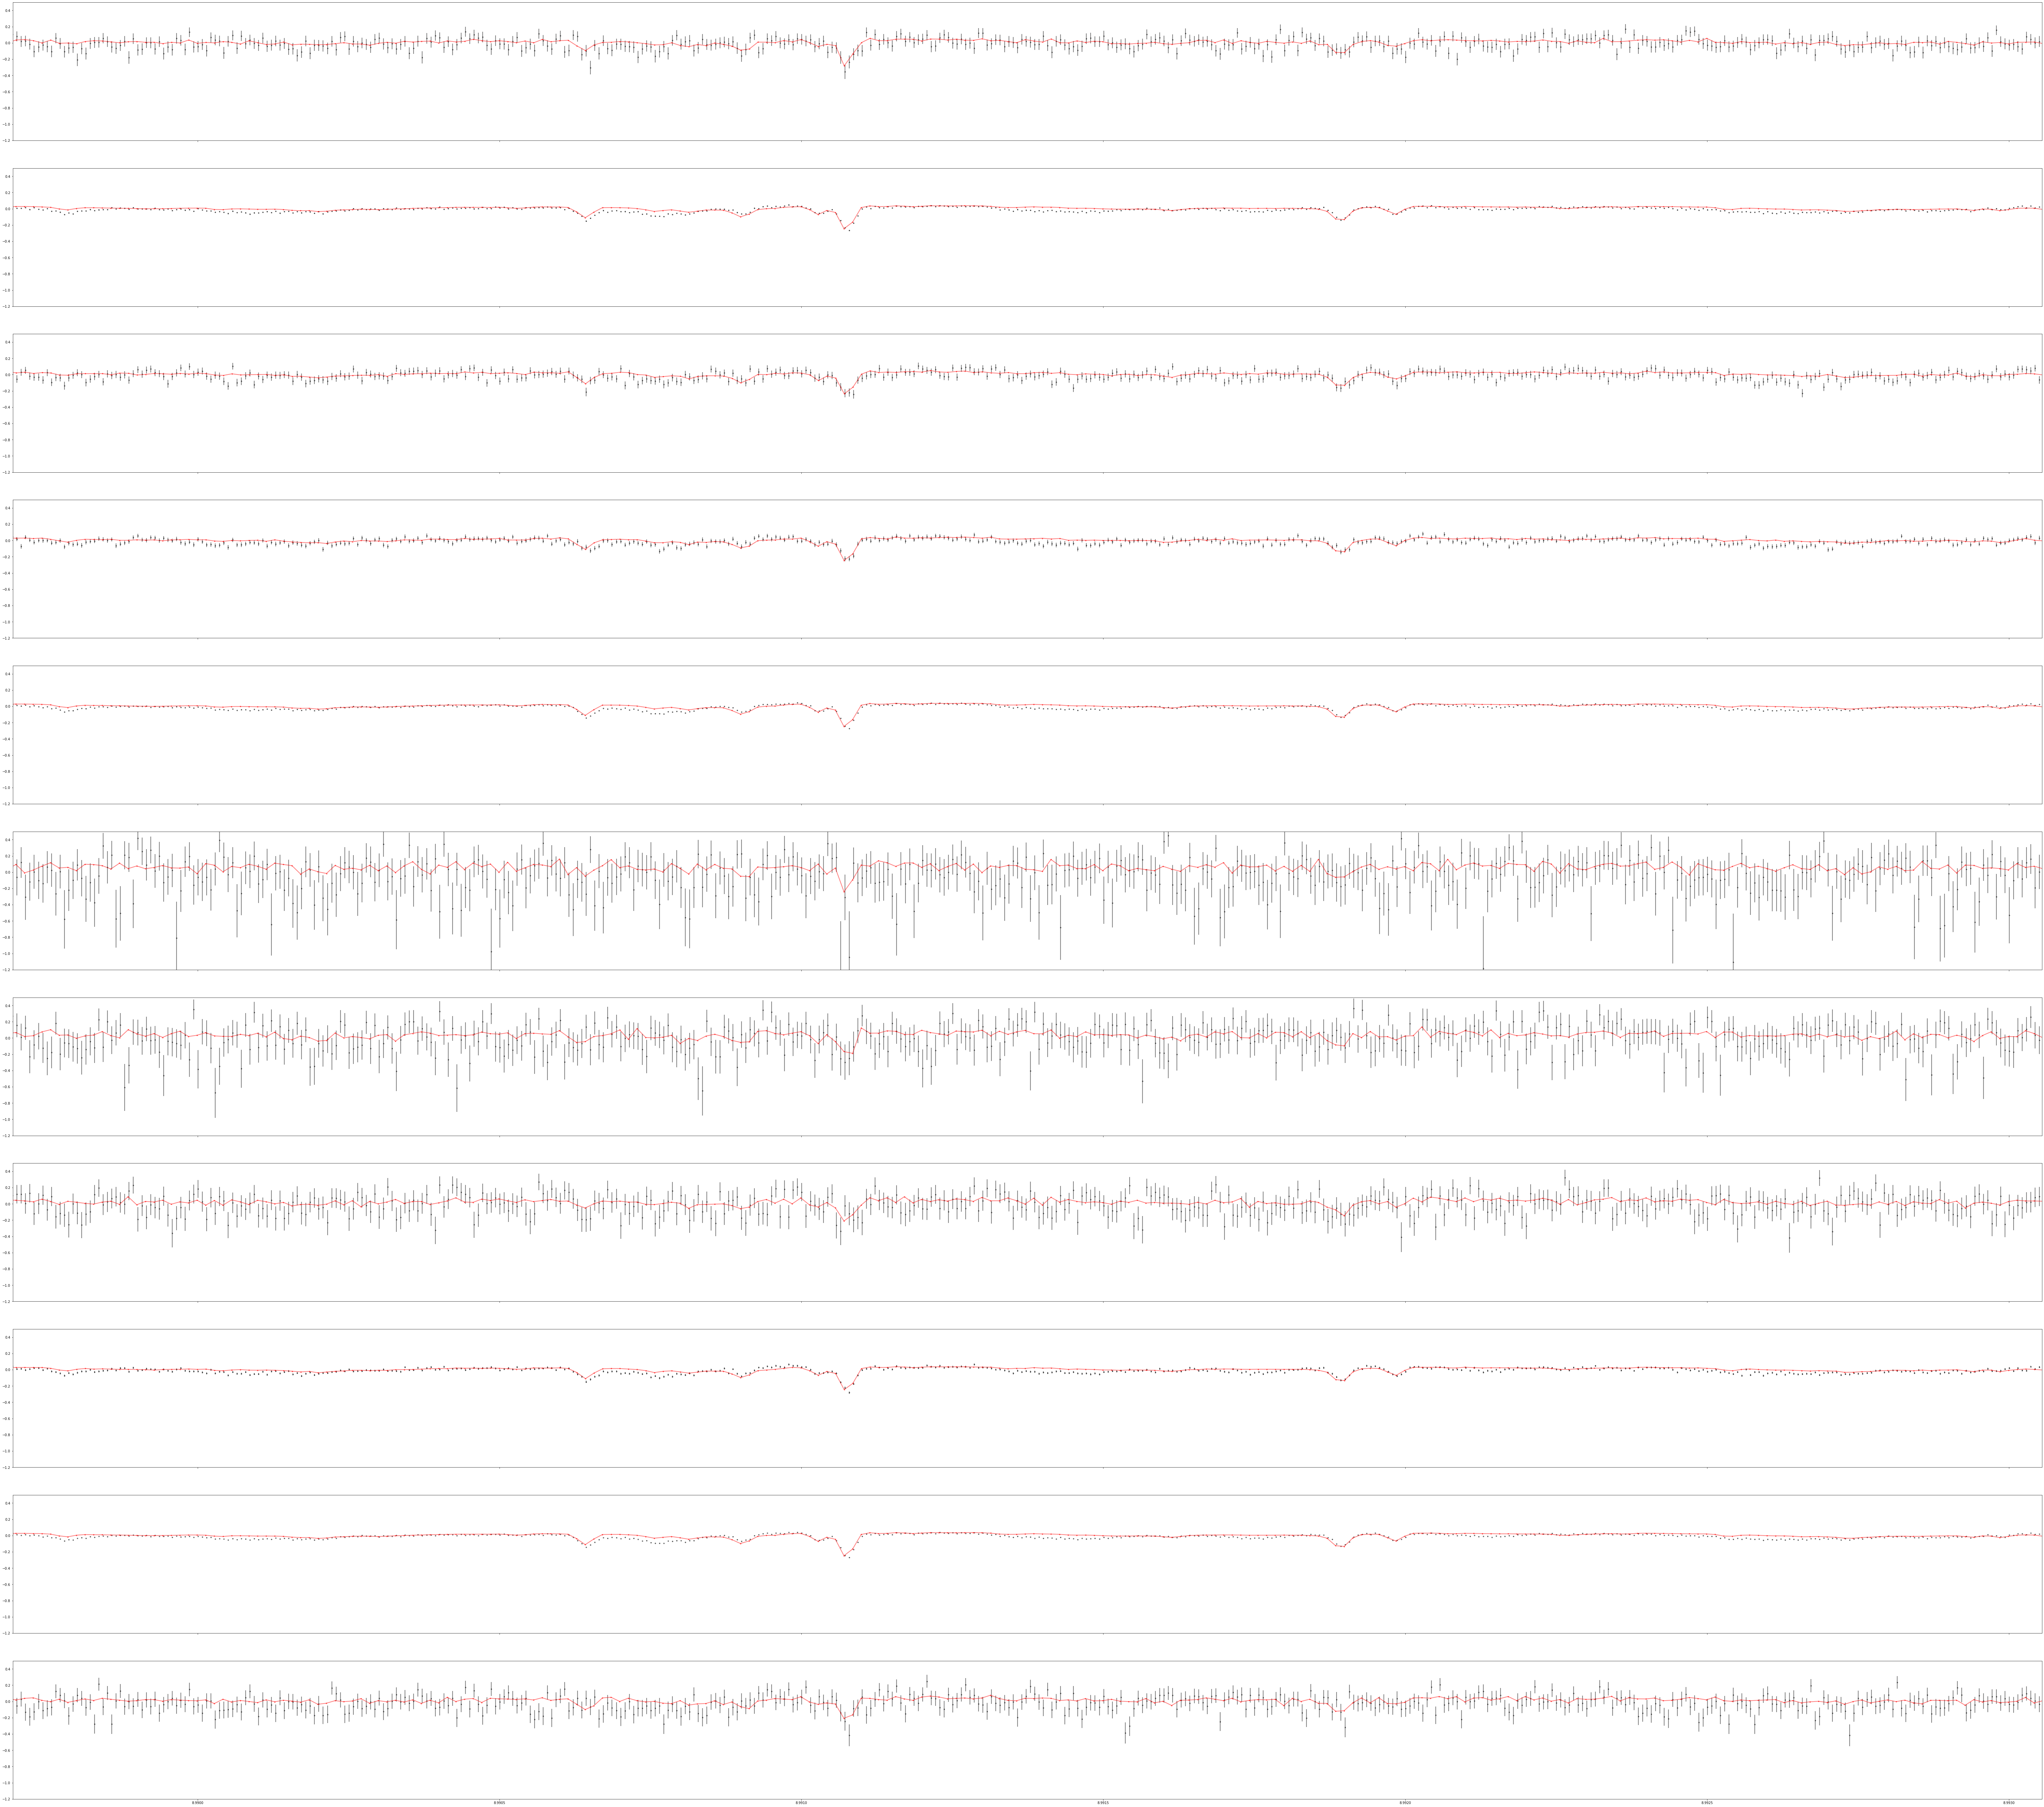

In [35]:
sigma = 80
xpmin = np.log(8020)
xpmax = np.log(8047)
plt_unit = u.Angstrom
plt_epoch = 1
fig, axes = plt.subplots(len(datasets),plt_epoch,figsize=(10 * len(datasets),100 * plt_epoch),sharex=True,sharey=True,facecolor=(1, 1, 1))
for i in range(len(datasets)):
    for j in range(plt_epoch):
#         datasets[i].plot_star(axes[i,j],j,xy='xy',units=plt_unit,normalize=normalize_2,nargs=[sigma])
#     data.plot_tellurics(axes[i],i,xy='xy',units=plt_unit)
    
        axes[i].errorbar(datasets[i].xs[j,:],datasets[i].ys[j,:],datasets[i].yerr[j,:],fmt='.k',elinewidth=2.2,zorder=1,alpha=0.5,ms=6)
        axes[i].plot(models[i][1].xs-models[i][0].p[j],models[i][1].p,'.r',linestyle='solid',linewidth=2.2,zorder=2,alpha=0.5,ms=6)
        axes[i].set_xlim(xpmin,xpmax)
        axes[i].set_ylim(-1.2,0.5)
plt.savefig('../out/star_plots.png',dpi=300,bbox_inches='tight')
plt.show()

In [36]:
# print(snrs)
from matplotlib import cm

In [37]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [38]:
%matplotlib inline

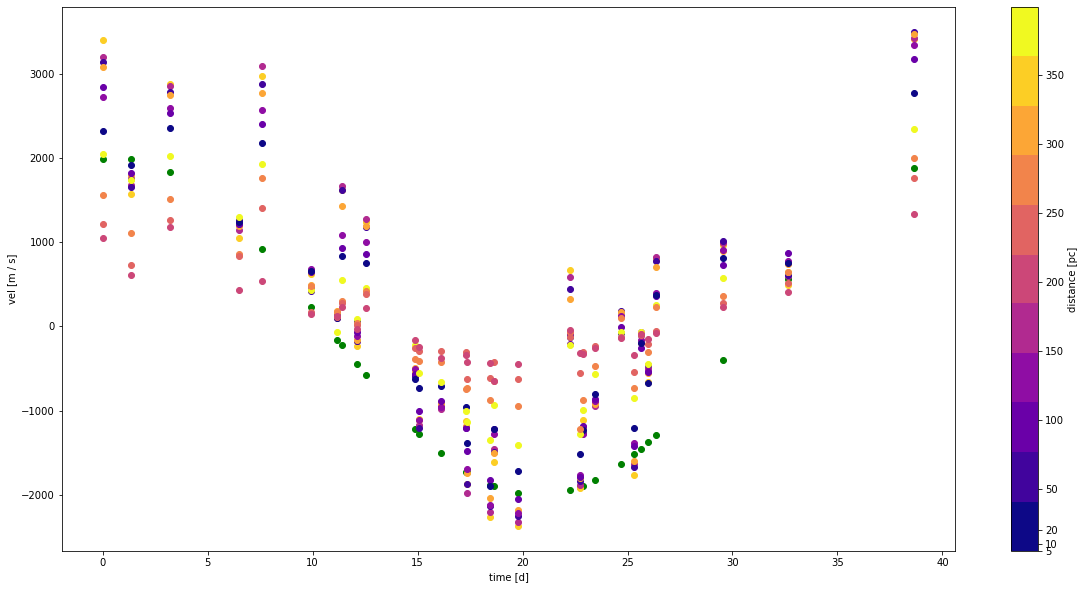

In [39]:
fig, axes = plt.subplots(1,figsize=(20,10),facecolor=(1, 1, 1))
v_unit = u.m/u.s
axes.plot((times - min(times)).to(u.day).value % period.value,(all_data[0]['data']['rvs'].to(u.km/u.s)-bcs).to(v_unit).value,'og',label='truth')
# v_unit = u.km/u.s
# axes[1].plot((timess[0] - min(timess[0])).to(u.day).value,(rvs[0]).to(v_unit).value,'og',label='truth')

pc_dist = [x['parameters']['star']['distance'].to(u.pc).value for x in all_data]
cmap = plt.get_cmap('plasma',len(pc_dist))
norm = mpl.colors.Normalize(vmin=np.min(pc_dist),vmax=np.max(pc_dist))
sm   = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ticks=pc_dist, 
             boundaries=np.arange(np.min(pc_dist),np.max(pc_dist)))
cbar.set_label('distance [pc]')

# fig.colorbar(cm.plasma)
for i in range(len(datasets)):
    final_vels = jabble.dataset.velocityfromshift(models[i][0].p)
    
    v_unit = u.m/u.s
    plot1 = axes.plot((times - min(times)).to(u.day).value % period.value,(final_vels-bcs).to(v_unit).value,'o',label='distances {:2.1f}'.format(pc_dist[i]),zorder=pc_dist[i],color=cmap(i))
#     axes[0].set_legend()
    axes.set_ylabel('vel [{}]'.format(v_unit))
    axes.set_xlabel('time [d]')

#     v_unit = u.km/u.s
#     plot2 = axes[1].plot((timess[i] - min(timess[i])).to(u.day).value,(final_vels).to(v_unit).value,'o',label='distances {:2.1f}'.format(pc_dist[i]),zorder=pc_dist[i],color=cmap(i))
# #     axes[1].set_legend()
#     axes[1].set_ylabel('vel [{}]'.format(v_unit))
#     axes[1].set_xlabel('time [d]')

# fig.colorbar(plot1, ax=axes[0])
# fig.colorbar(plot2, ax=axes[1])

    
# fig.legend()
# fig.tight_layout(pad=2)
plt.savefig('../out/velocity_plots.png',dpi=300,bbox_inches='tight')
plt.show()